## Exploring DES Y3 Data

In this notebook we explore data from the 3rd year of the DES run.

The aim is to see how one can define a sample that maximizes the forecasted Figure of Merit for the constraints on the $\Omega_m - \sigma_8$ plane.

#### Some Preliminary cuts

We will perform some preliminary quality cuts:

Cuts for color outliers:

\begin{eqnarray}
- 1 < g_{auto} - r_{auto} < 3\\
- 1 < r_{auto} - i_{auto} < 2.5 \\
- 1 < i_{auto} - z_{auto} < 1.7 \\
\end{eqnarray}

Completeness:
\begin{equation}
i_{auto} < 22
\end{equation}

Quality:
\begin{equation}
flags\_badregion < 4\,\, ; \,\, flags\_gold = 0
\end{equation}

Star-galaxy separation: 
\begin{equation}
spread\_model\_i + (5/3)spreaderr\_model\_i > 0.007
\end{equation}

Flux:
\begin{equation}
17.5 < i_{auto} < 19.0 + 3.0z
\end{equation}

These cuts are the same to those presented in the BAO paper that used Y1 data, but they are probably good to use here because they characterize the quality of the data.


I will select both BPZ and DNF photo-zs. I will first work with DNF, but I will also play with BPZ.



In [48]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate 
from code.plot_utils import plot_pretty
from astropy.io import fits
import skymapper as skm
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [49]:
#Now the data
Y3 = fits.open('DESY3.fits')

print Y3[1].header.keys

<bound method Header.keys of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   76 / length of dimension 1                          
NAXIS2  =              1558662 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   14 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'D       '                                                            

In [50]:
z_mc = Y3[1].data['dnf_zmc_mof']
z_mean = Y3[1].data['dnf_zmean_mof']
z_sig = Y3[1].data['dnf_zsigma_mof']

i_auto = Y3[1].data['mag_auto_i']
g_auto = Y3[1].data['mag_auto_g']
r_auto = Y3[1].data['mag_auto_r']
z_auto = Y3[1].data['mag_auto_z']
spread_model_i = Y3[1].data['spread_model_i']
speraderr_model_i = Y3[1].data['spreaderr_model_i']
RA = Y3[1].data['ra']
DEC = Y3[1].data['dec']

#size before any cuts:

print(64.0*np.size(z_mean))

99754368.0


Let's apply the color outlier, quality and flux cuts.

In [51]:
z_mc_1 = z_mc[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_mean))&(z_mean<2.0)]
z_mean_1 = z_mean[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_mean))&(z_mean<2.0)]
z_sig_1 = z_sig[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_mean))&(z_mean<2.0)]

i_auto_1 = i_auto[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_mean))&(z_mean<2.0)]
g_auto_1 = g_auto[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_mean))&(z_mean<2.0)]
r_auto_1 = r_auto[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_mean))&(z_mean<2.0)]
z_auto_1 = z_auto[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_mean))&(z_mean<2.0)]
RA_1 = RA[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_mean))&(z_mean<2.0)]
DEC_1 = DEC[((g_auto-r_auto)>-1.0)&((g_auto-r_auto)<3.0)&((r_auto-i_auto)>-1.0)&((r_auto-i_auto)<2.5)&((i_auto-z_auto)>-1.0)&((i_auto-z_auto)<2.0)&((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)&((i_auto)<(19.0+3.0*z_mean))&(z_mean<2.0)]


Now let's plot the sample

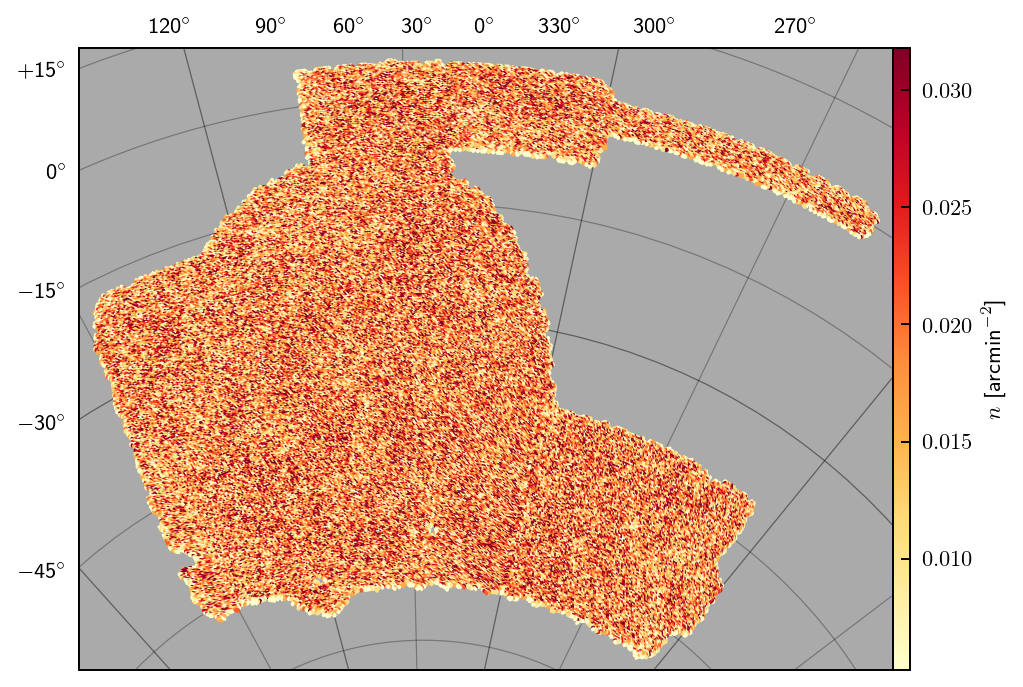

In [52]:
# plot density in healpix cells
nside = 4*64
sep = 4*15


plot_pretty()
fig, ax, proj = skm.plotDensity(RA_1, DEC_1, nside=nside, sep=sep)
sep = 15
meridians = np.arange(-90, 90+sep, sep)
parallels = np.arange(0, 360+2*sep, 2*sep)
skm.setMeridianPatches(ax, proj, meridians, linestyle='-', lw=0.5, alpha=0.3, zorder=2)
skm.setParallelPatches(ax, proj, parallels, linestyle='-', lw=0.5, alpha=0.3, zorder=2)
skm.setMeridianLabels(ax, proj, meridians, loc="left", fmt=skm.pmDegFormatter)
skm.setParallelLabels(ax, proj, parallels, loc="bottom") 

######  Let's explore the GOLD sample, before performing further cuts

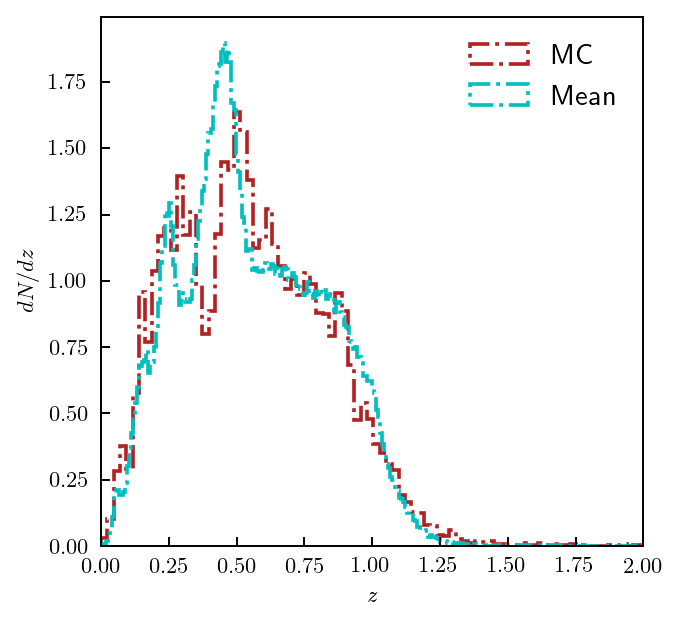

In [53]:
plot_pretty() 

fig = plt.figure(figsize = (4,4))

plt.hist(z_mc_1, bins=300, histtype='step', color='firebrick', ls='-.', linewidth = 1.5, normed=True, label='MC' )
plt.hist(z_mean_1, bins=300, histtype='step', color='c',  ls='-.', linewidth = 1.5, normed=True, label='Mean')

plt.xlim(0.0,2.0)

plt.xlabel('$z$')
plt.ylabel('$dN/dz$')




plt.legend(frameon=False, loc='upper right', fontsize=12)
plt.show()

Let's fit the MC distribution to a form:

\begin{equation}
\frac{dn}{dz} = \frac{\beta}{z_0 \Gamma{\left(\frac{\alpha+1}{\beta}\right)}}\left(\frac{z}{z_0} \right)^\alpha \exp\left[-\left(\frac{z}{z_0} \right)^\beta \right]
\end{equation}

In [54]:
from scipy.special import gamma
from scipy.optimize import curve_fit 

y_like , x =  np.histogram(z_mc_1, bins=300, normed=True)
n = np.size(x)
x_like = np.zeros(n-1)
for i in range(0,n-1):
    x_like[i] = 0.5*(x[i]+x[i+1])
    
    


#================================================================
def dndz_fun(z_l, z_0, alpha, beta):
    prefact = beta/(z_0*gamma((alpha+1.0)/beta))
    dndz = prefact*((z_l/z_0)**alpha)*np.exp(-((z_l/z_0)**beta))
    return dndz

init_par = [0.8, 2.0, 3.0]

#==============================================================

best_vals, covar = curve_fit(dndz_fun, x_like, y_like, p0=init_par)

best_z0 = best_vals[0]
best_a = best_vals[1]
best_b = best_vals[2]

(0.79237294107693601, 0.74117437640623418, 2.7781259919900285)


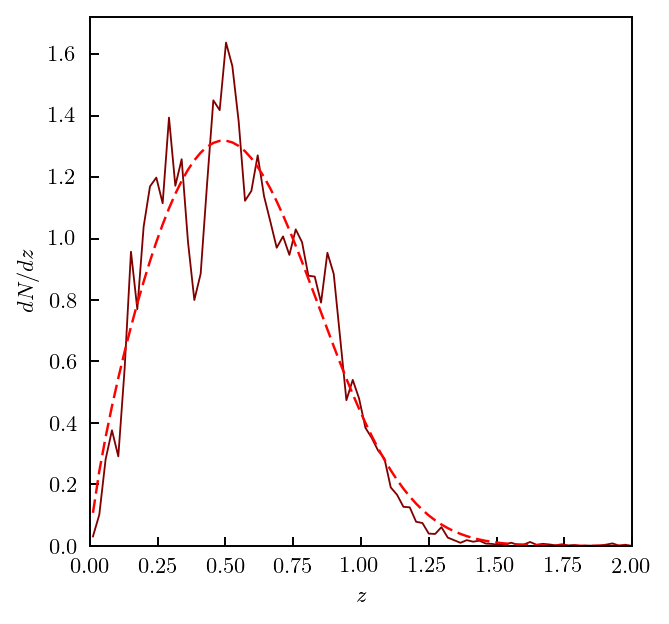

In [55]:
fig = plt.figure(figsize = (4,4))



#plt.hist(redspec, bins=120, normed=True)
plt.plot(x_like, y_like, c='maroon', linewidth=0.75)
plt.plot(x_like, dndz_fun(x_like, best_z0, best_a, best_b), c='r', ls='--', linewidth=1.0)



plt.xlabel('$z$')
plt.ylabel('$dN/dz$')
plt.xlim(0.0,2.0)
plt.ylim(0.0,)

plt.plot()
print(best_z0, best_a, best_b)

Total Number of galaxies before color cuts is:

In [56]:
print(64.0*np.size(z_mean_1))

20923136.0


#### Binning 

We will split the sample in five redshift bins in the interval $z \in [0.15,0.9]$ similar to those of the RedMaGic galaxies.



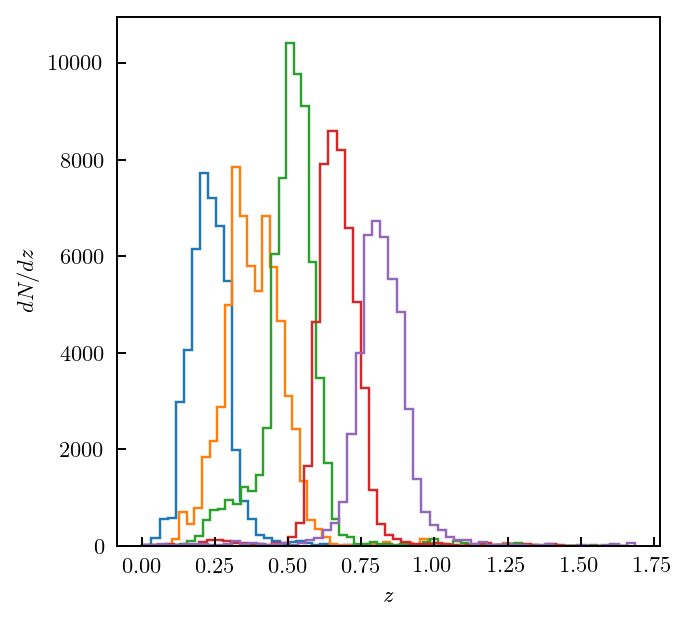

In [62]:
bin_1 = z_mc_1[(z_mean_1>0.15)&(z_mean_1<0.30)&(z_mc_1<1.7)]
bin_2 = z_mc_1[(z_mean_1>0.30)&(z_mean_1<0.45)&(z_mc_1<1.7)]
bin_3 = z_mc_1[(z_mean_1>0.45)&(z_mean_1<0.60)&(z_mc_1<1.7)]
bin_4 = z_mc_1[(z_mean_1>0.60)&(z_mean_1<0.75)&(z_mc_1<1.7)]
bin_5 = z_mc_1[(z_mean_1>0.75)&(z_mean_1<0.90)&(z_mc_1<1.7)]


plot_pretty() 

fig = plt.figure(figsize = (4,4))

plt.hist(bin_1, bins=60, histtype='step', normed=False)
plt.hist(bin_2, bins=60, histtype='step', normed=False)
plt.hist(bin_3, bins=60, histtype='step',  normed=False)
plt.hist(bin_4, bins=60, histtype='step', normed=False)
plt.hist(bin_5, bins=60, histtype='step', normed=False)

plt.xlabel('$z$')
plt.ylabel('$dN/dz$')

plt.show()



### Color cuts

Next we want to select a red sample for clustering measurements, optimized such that the $\Omega_m - \sigma_8$ plane FoM is maximum. 

Similarly to the BAO selection paper and the DES Y1 explorations, we impose a color cut of the form:

\begin{equation}
(i_{auto} - z_{auto}) + a_1(r_{auto} - i_{auto}) > a_2
\end{equation}

We want to run a grid of $[a_1,a_2]$ values, define a sample based on color cuts for each pair of values in the grid, calcuate redshift distributions and number of galaxies in each redshift bin and then calculate the Fisher matrix and thus the forecasted figure of merit.

For $a_1$ and $a_2$ let's choose:

\begin{equation} 
a_1 \in [0.5-2.0]
\end{equation}

\begin{equation}
a_2 \in [0.5 - 3.0]
\end{equation}

Then, we will explore if how important/robust is this choice for the color-space grid.

### Single redshift bin Fisher Matrix

Code that calculates fisher matrix for a single bin. Inputs: photo-z range, normalized redshift distribution of galaxies, bias.


Using the Limber and flat-sky approximations, we model the angular power spectrum in a redshift bin $i$ as:

\begin{equation}
C_\ell^i = \int { dz \frac{H(z)}{c} \frac{W_{i}^2(z)}{\chi^2(z)} P_{NL} \left(k= \frac{\ell+1/2}{\chi(z)};z \right)}
\end{equation}

where the efficiency kernel for galaxy clustering, at a redshift bin $i$, is:

\begin{equation}
W^i(z) = b(z) n^{i}(z),
\end{equation}

$n^{i}(z)$ being the normalized redshift distribution of galaxies inside the redshift bin $i$ and $b(z)$ the (linear)  bias. Here, for simplicity, we adopt $b(z) = 1.6 =$constant.

The Fisher matrix for parameters $\theta_\mu, \theta_\nu$ is given by:


\begin{equation}
F_{\mu\nu} = \sum_{\ell_{min}}^{\ell_{max}} \frac{1}{\sigma_{\ell,i}^2}\frac{\partial C_\ell^i}{\partial \theta_\mu}\frac{\partial C_\ell^i}{\partial \theta_\nu}
\end{equation}

Where:

\begin{equation}
\sigma_{\ell,i} = \delta C_{\ell}^{i} = \sqrt{\frac{2}{f_{sky}(2\ell+1)}}\left(C_\ell^i + \frac{1}{\bar{n}^i} \right)
\end{equation}

where $\bar{n}^i$ the angular number density of galaxies in redshift bin $i$.

For a number of (uncorrelated) bins, the total Fisher matrix is:

\begin{equation}
F_{\mu \nu}^{tot} = \sum_i F_{\mu \nu}^i
\end{equation} 

In [64]:
import camb
from camb import model, initialpower

In [65]:
# Now create a class that can create CAMB cosmologies for different matter densities and sigma_8

class Cosmology:
    
    def __init__(self,omega_m,sigma_8,h,z):
        self.omega_m = omega_m
        self.sigma_8 = sigma_8
        self.h = h
        self.z = z
        self.k_max = 10.0
        self.c = 2.99792e+5
        #=========================
        
        cosmo = camb.CAMBparams()
        cosmo.set_cosmology(H0=100*self.h, ombh2=0.049*(self.h**2.0), omch2=(self.omega_m - 0.049)*(self.h**2.0), mnu=0.06, omk=0, tau=0.06)
        cosmo.InitPower.set_params(As=2.0e-9, ns=0.96)
        results = camb.get_results(cosmo)
        cosmo.set_matter_power(redshifts=[0.0], kmax=10.0)
        cambres= camb.get_transfer_functions(cosmo)
        cosmo.NonLinear = model.NonLinear_both
        kh, z, pk = cambres.get_matter_power_spectrum(minkh=1e-3, maxkh=1.0, npoints = 10)
        sigma_8_temp = cambres.get_sigma8()
        As_new  = ((self.sigma_8/sigma_8_temp)**2.0)*(2.0e-9)
        cosmo.InitPower.set_params(As=As_new, ns=0.96)
        cambres = camb.get_results(cosmo)
        backres = camb.get_background(cosmo)

        self.chi = backres.comoving_radial_distance(self.z)
           
        self.PK = camb.get_matter_power_interpolator(cosmo, nonlinear=True, 
                hubble_units=False, k_hunit=False, kmax=self.k_max, zmin = 0.0, zmax=self.z[-1]) 
        
        self.H_z = (backres.hubble_parameter(self.z))/self.c #Hubble parameter in 1/Mpc 

In [66]:
# Instantize cosmologies 

omega_m = 0.31
sigma_8 = 0.81
h = 0.675
alpha_om  = omega_m/10.0
alpha_sig = sigma_8/10.0

#==========================
nz = 1000 #number of steps to use for the radial/redshift integration

zarray = np.linspace(0,4.0,nz)
z = zarray[1:-1]

cosmo_fid = Cosmology(omega_m, sigma_8, h, z)
cosmo_1 = Cosmology(omega_m + alpha_om, sigma_8, h, z)
cosmo_2 = Cosmology(omega_m - alpha_om, sigma_8, h, z)
cosmo_3 = Cosmology(omega_m, sigma_8 + alpha_sig, h, z)
cosmo_4 = Cosmology(omega_m, sigma_8 - alpha_sig, h, z)

In [67]:
def cosmoselector(omega, sigma):
    #function that selects cosmology
    
    omfid = 0.31
    sigfid = 0.81
    
    cosmo_dict = {'cosmo_fid': cosmo_fid,
                  'cosmo_1' : cosmo_1,
                  'cosmo_2' : cosmo_2,
                  'cosmo_3' : cosmo_3,
                  'cosmo_4' : cosmo_4}
    
    
    if (omega==omfid):
        if (sigma == sigfid):
            cosm_sel = cosmo_dict['cosmo_fid']
        elif (sigma > sigfid):
            cosm_sel = cosmo_dict['cosmo_3']
        else:
            cosm_sel = cosmo_dict['cosmo_4']
    elif (omega > omfid): 
        cosm_sel = cosmo_dict['cosmo_1']
    else:
        cosm_sel = cosmo_dict['cosmo_2']
        
    
    return cosm_sel 

In [68]:
# Function that calculates C_l,i

def C_l_i(bias, n_z, Omega_m_var , sig_8_var):
    """
    Function that calculates the C_l between two bins 
    -----------------
    Inputs:
    bias : bias - constant or function
    n_z : redshift distribution at a redshift bin
    Omega_m_var: Omega matter - can change
    sig_8_var : Sigma_8 parameter - can change
    --------------
    Returns:
    ls and C_l betwenn two bins, i and j. It is the auto spectrum if i=j
    """
    # Constant
    h = 0.675
    c = 2.99792e+5
    
    #======================================
    #====================================================================================
    #====================================================================================
    # Selecting cosmology
    
    cosmo = cosmoselector(Omega_m_var, sig_8_var)
    
    #====================================================================================
    #====================================================================================
    #Redshift range for calculations and integration
    
    nz = 1000 #number of steps to use for the radial/redshift integration
    kmax=10.0  #kmax to use

    zarray = np.linspace(0,4.0,nz)
    dzarray = (zarray[2:]-zarray[:-2])/2.0
    zarray = zarray[1:-1]
    
    
    #Calculate square of the window function

    W_sq = (bias*n_z)**2.0
    
    
    #====================================================================================
    #====================================================================================
    #Calculate Hubble parameter and comoving distance
    
    Hubble = cosmo.H_z
    
    # Get comoving distance - in Mpc/h
    chis = cosmo.chi
    
    #========================================================
    # Get the full prefactor of the integral
    prefact = W_sq*Hubble/(chis**2.0)
    #====================================================================================
    
    #===================================================================================
    #===================================================================================
    #Do integral over z
    
    ls_lin = np.linspace(1.0, 3.0, 50, dtype = np.float64)
    ls = 10.0**ls_lin
    
    c_ell=np.zeros(ls.shape)
    w = np.ones(chis.shape) #this is just used to set to zero k values out of range of interpolation
    for i, l in enumerate(ls):
        k=(l+0.5)/chis
        w[:]=1
        w[k<1e-4]=0
        w[k>=kmax]=0
        c_ell[i] = np.dot(dzarray, w*cosmo.PK.P(zarray, k, grid=False)*prefact)
    
    #===================================================================================
    # Retrurn the array of C_ell
    
    return ls, c_ell



#===================================================================================
# Here are the derivatives with respect to matter density and sigma_8
#===================================================================================

def matter_der_C_l_i(bias, n_z, Omega_m , sig_8):
    """
    Function that calculates the derivative of C_l with respect to matter between two bins 
    -----------------
    Inputs:
    z_i : Lower limit of the redshift bin
    z_f : Upper limit of the redshift bin
    bias : the linear galaxy bias
    n_z : the normalized redshift distribution
    Omega_m: Omega matter
    sig_8: Sigma_8 parameter
    
    ---------------
    Returns:
    derivative w/r to matter of C_l betwenn two bins, i and j
    """
    alpha = Omega_m/10.0
    
    C_mat_1 = C_l_i(bias, n_z, Omega_m+alpha , sig_8)[1]
    C_mat_2 = C_l_i(bias, n_z, Omega_m-alpha , sig_8)[1]
    
    mat_der = (C_mat_1 - C_mat_2)/(2.0*alpha)
    return mat_der
    
    
    #===================================================================================
    
def sigma_der_C_l_i(bias, n_z, Omega_m , sig_8):
    """
    Function that calculates the derivative of C_l with respect to sigma_8 between two bins 
    -----------------
    Inputs:
    bias : the linear galaxy bias
    n_z : the normalized redshift distribution
    Omega_m: Omega matter
    sig_8: Sigma_8 parameter
    ---------------
    Returns:
    derivative w/r to matter of C_l betwenn two bins, i and j
    """
    
    alpha = sig_8/10.0
    
    C_sig_1 = C_l_i(bias, n_z, Omega_m, sig_8+alpha)[1]
    C_sig_2 = C_l_i(bias, n_z, Omega_m , sig_8-alpha)[1]
    
    sig_der = (C_sig_1 - C_sig_2)/(2.0*alpha)
    return sig_der

In [69]:
from scipy.interpolate import UnivariateSpline

def Fish_single_bin(z_mean, bias, n_z, f_sky, N_gal):
    """
    Calculates and returns the Fisher matrix for a single bin
    ----------------------------------------
    Inputs:
    z_mean : mean redshift of the bin
    bias : bias - function or constant
    n_z : redshift distribution of the bin
    f_sky : fraction of the sky the survey covers 
    N_gal : number of galaxies in the bin
    
    ---------------------------------------
    Outputs:
    Fisher matrix for a single bin
    """
    
    
    Omega_m = 0.31
    sigma_8 = 0.81
    h = 0.675
    
    #Setting up cosmology - need to calculate chis
    
    # Setting up cosmology
    
    cosmo = camb.CAMBparams()
    cosmo.set_cosmology(H0=67.5, ombh2=0.049*(h**2.0), omch2=(Omega_m - 0.049)*(h**2.0), mnu=0.06, omk=0, tau=0.06)
    backres = camb.get_background(cosmo)
    #=============================================================
    
    #=============================================================
    
    #Redshift range for calculations and integration
    
    nz = 1000 #number of steps to use for the radial/redshift integration
    kmax=10.0  #kmax to use

    zarray = np.linspace(0,4.0,nz)
    dzarray = (zarray[2:]-zarray[:-2])/2.0
    zarray = zarray[1:-1]
    
    #==============================================================================
    # calculation of l_max
    chi_mean = backres.comoving_radial_distance(z_mean)/h   # comoving distance corresponding to the mean redshift of the bin
    k_cutoff= 0.2*h #Cutoff scale in  Mpc^{-1}
    l_max = int(round(chi_mean*k_cutoff))
    
    #==============================================================================
    #==============================================================================
    #Calculation of the angular number density galaxies / steradian
    
    ster = f_sky*(4.0*np.pi)
    n_bin = N_gal/ster
    
    #===============================================================================
    # Now take the ls, C_ls and the derivatives of the C_ls - then keep only up to lmax
    ell_lin = np.linspace(1.0, 3.0, 50, dtype = np.float64)
    
    C_ell_1 = C_l_i(bias, n_z, Omega_m , sigma_8)[1]
    dC_ldOm_1 = matter_der_C_l_i( bias, n_z, Omega_m , sigma_8)
    dC_ldsig8_1 = sigma_der_C_l_i( bias, n_z, Omega_m , sigma_8)
    
    for s in range(0,np.size(dC_ldOm_1)):
        if (np.sign(dC_ldOm_1[s])>=0.0):
            l_break = 0.5*(ell_lin[s]+ell_lin[s-1])
            break
            
    ls = np.arange(10,1000, dtype=np.float64) 
    
    C_ell = np.zeros(np.size(ls))
    dC_ldOm = np.zeros(np.size(ls))
    dC_ldsig8 = np.zeros(np.size(ls))
    #====================================================================
    
    C_l_matr_interp  = UnivariateSpline(ell_lin, np.log10(C_ell_1+ 1.0e-20))
    C_omeg_interp = UnivariateSpline(ell_lin, np.log10(abs(dC_ldOm_1+1.0e-20)))
    C_sig_interp = UnivariateSpline(ell_lin, np.log10(dC_ldsig8_1+1.0e-20))
    for k, l in enumerate(ls):
        ell = np.log10(float(l))
        C_ell[k]  = 10.0**(C_l_matr_interp(ell))
        dC_ldsig8[k] = 10.0**(C_sig_interp(ell))
        if (ell < l_break):
            dC_ldOm[k] = -(10.0**C_omeg_interp(ell))
        else: 
            dC_ldOm[k] = (10.0**C_omeg_interp(ell))
            
    
    ls = ls[:l_max-9]
    C_ell = C_ell[:l_max-9]
    dC_ldOm = dC_ldOm[:l_max-9]
    dC_ldsig8 = dC_ldsig8[:l_max-9]
    
    #Create arrays with sigma^2
    sigma_sq = (2.0/(f_sky*(2.0*ls + 1.0)))*((C_ell + 1.0/n_bin )**2.0)
    
    #===============================================================================
    #===============================================================================
    # Calculation of the elements of the Fisher matrix
    Fish = np.zeros([2,2])
    
    # 0 = matter, 1 = sigma_8
    
    Fish[0,0] = sum((1.0/sigma_sq)*(dC_ldOm**2.0)) 
    Fish[1,1] = sum((1.0/sigma_sq)*(dC_ldsig8**2.0)) 
    Fish[0,1]=Fish[1,0]= sum((1.0/sigma_sq)*(dC_ldOm*dC_ldsig8))
    
    
    return Fish

### Running in the grid - Figure of Merit

In [72]:
from scipy.interpolate import UnivariateSpline as spl
#============================================================
bias = 1.6
f_sky = 5000.0/41253.0

#============================================================
#a_1 range for the grid
a_1_gr = np.linspace(0.4,2.1,43)
#a_2 range for the grid
a_2_gr = np.linspace(0.4,3.1,43)

size = np.size(a_1_gr)  # size of a_1_gr has to be the same as the size of a_2_gr
#============================================================
# Initialize matrix
FoM = np.zeros([size,size])

#============================================================
numz = 1000 #number of steps to use for the radial/redshift integration
zarray = np.linspace(0.0,4.0,numz)
z = zarray[1:-1]
#============================================================

for i in range(0,size):
    print(i)
    a_1_t = a_1_gr[i]
    for j in range(0,size):
        a_2_t = a_2_gr[j]
        
        
        #Now apply to the sample the cuts for these values of a_1, and a_2
        z_mean_temp = z_mean_1[(((i_auto_1-z_auto_1)+a_1_t*(r_auto_1-i_auto_1))>a_2_t)]
        z_mc_temp = z_mc_1[(((i_auto_1-z_auto_1)+a_1_t*(r_auto_1-i_auto_1))>a_2_t)]
        
        
        Fish_mat  = 0.0 # initalize fisher matrix
        #Create five bins and calculate Fisher matrix in each of them
        for k in range(0,5):
            z_i = 0.15 + k*0.15  # lower redshift limit of the bin
            z_f = 0.15 + (k+1)*0.15  # upper redshift limit of the bin
            
            bin_z = z_mc_temp[(z_mean_temp>z_i)&(z_mean_temp<z_f)]  #select the galaxies with mean redshifts inside the phot-z limits 
           
            if (np.size(bin_z)>0.0):
                mean_z = np.mean(bin_z)   #mean redshift of the bin
                N_gal = 64.0*np.size(bin_z)  #number of galaxies in the bin. note: here multiplied by 64
                #because i have used a sample which is 1/64 of the total
            
                y_like, x_like = np.histogram(bin_z, bins=200, normed=True) # take a histogram for the redshift distribution 
                x_like = x_like[:-1]
            
                bin_sp = spl(x_like,y_like,s=0.0, ext=1)     #Interpolate 
                n_z = bin_sp(z)   # this is the normalized n(z) in the range (0.0,4.0)
            
                Fish_mat += Fish_single_bin(mean_z, bias, n_z, f_sky, N_gal)
            else:
                Fish_mat += np.array([[1.0e-20, 1.0e-20], [1.0e-20, 1.0e-20]])
            
        
        
        FoM[i][j] = np.sqrt(np.linalg.det(Fish_mat))
            
            
        
FoM_matr = np.matrix.transpose(FoM)
FoM_matr = FoM_matr/np.max(FoM_matr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


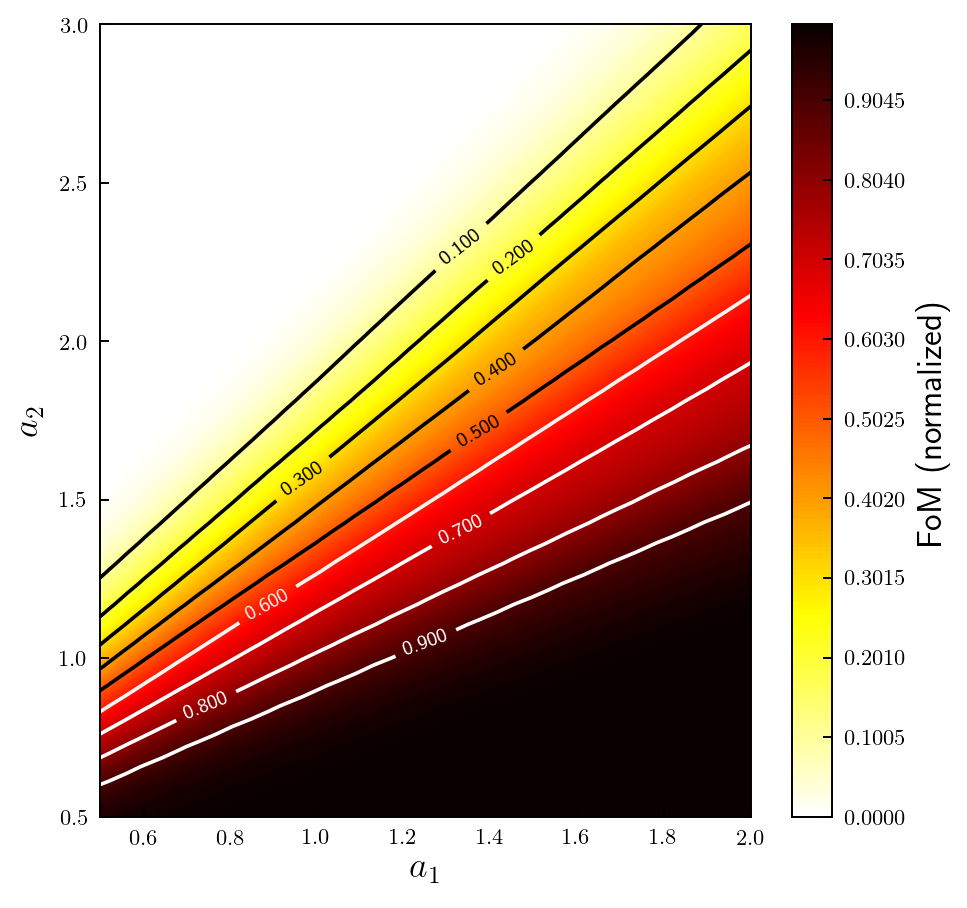

In [73]:
import scipy.ndimage

def FoM_return(a_1,a_2):
    FoMino = FoM_matr
    return FoMino


plot_pretty() 
fig = plt.figure(figsize = (6,6))

a_1, a_2 = np.meshgrid(a_1_gr, a_2_gr)
FoM_pr = FoM_return(a_1, a_2)

FoM_pr = scipy.ndimage.gaussian_filter(FoM_pr, 1)

#image = plt.pcolormesh(a_1, a_2, FoM_pr , cmap=plt.cm.hot_r)
levels = np.linspace(0.0,1.0,200)
image = plt.contourf(a_1, a_2, FoM_pr , levels=levels, cmap=plt.cm.hot_r)
C = plt.contour(a_1, a_2, FoM_pr, 10,  colors=('k', 'k', 'k', 'k','k', 'whitesmoke', 'w', 'w','w','w'), linestyle ='--',  linewidth=.5)
plt.clabel(C, inline=2, fontsize=8)


#plt.xscale('log');plt.yscale('log')

plt.xlabel("$a_1$", fontsize=15)
plt.ylabel("$a_2$", fontsize=15)


plt.xlim(0.5,2.0)
plt.ylim(0.5,3.0)



cbar = plt.colorbar(image, orientation='vertical')
cbar.set_label('FoM (normalized)', fontsize=14)

plt.savefig('FoM_colorcuts.pdf')
plt.show() 



### Now compare color cuts

Select a few specific color cuts and compare the confidence contours.

First compare high and low figure of merit. 


##### High-Low FoM

Having as guide the above plot choose:

Low FoM:

\begin{equation}
a_1 = 1.25 \\
a_2 = 2.00
\end{equation}

High FoM:

\begin{equation}
a_1 = 1.25\\
a_2 = 1.00
\end{equation}

Very High FoM:

\begin{equation}
a_1 = 2.0\\
a_2 = 0.5
\end{equation}

In [87]:
z_mean_low = z_mean_1[(((i_auto_1-z_auto_1)+1.25*(r_auto_1-i_auto_1))>2.00)]
z_mc_low = z_mc_1[(((i_auto_1-z_auto_1)+1.25*(r_auto_1-i_auto_1))>2.00)]

z_mean_high = z_mean_1[(((i_auto_1-z_auto_1)+1.25*(r_auto_1-i_auto_1))>1.00)]
z_mc_high = z_mc_1[(((i_auto_1-z_auto_1)+1.25*(r_auto_1-i_auto_1))>1.00)]

z_mean_v_high = z_mean_1[(((i_auto_1-z_auto_1)+2.00*(r_auto_1-i_auto_1))>0.50)]
z_mc_v_high = z_mc_1[(((i_auto_1-z_auto_1)+2.00*(r_auto_1-i_auto_1))>0.50)]



print(np.size(z_mc_low))
print(np.size(z_mc_high))
print(np.size(z_mc_v_high))

22460
172609
322476


##### plot their corresponding redshift distributions

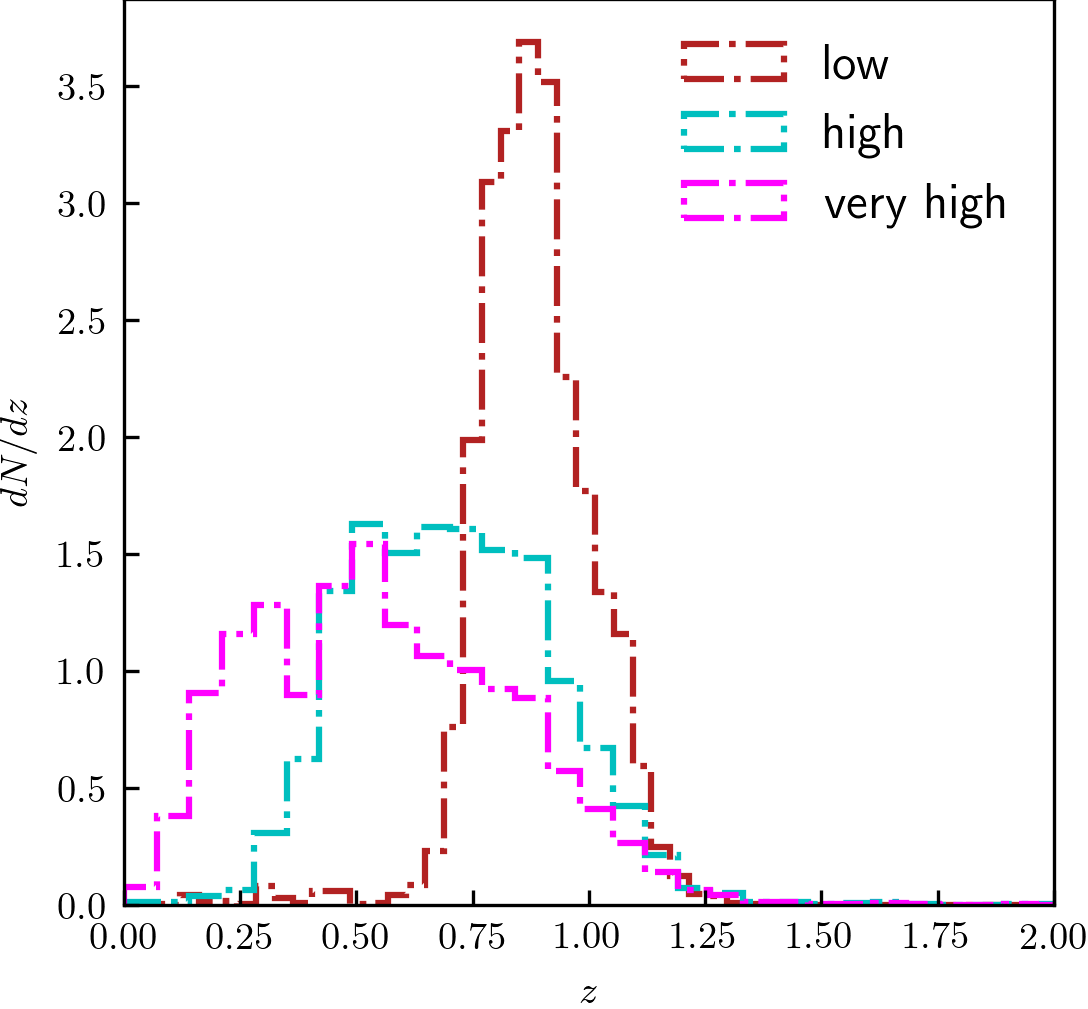

In [91]:
fig = plt.figure(figsize = (4,4))

plt.hist(z_mc_low, bins=100, histtype='step', color='firebrick', ls='-.', linewidth = 1.5, normed=True, label='low' )
plt.hist(z_mc_high, bins=100, histtype='step', color='c',  ls='-.', linewidth = 1.5, normed=True, label='high')
plt.hist(z_mc_v_high, bins=100, histtype='step', color='magenta',  ls='-.', linewidth = 1.5, normed=True, label='very high')
plt.xlim(0.0,2.0)

plt.xlabel('$z$')
plt.ylabel('$dN/dz$')




plt.legend(frameon=False, loc='upper right', fontsize=12)
plt.show()

#### Calculate Fisher Matrices and Confidence Contours

In [96]:
Fish_mat_low  = 0.0 # initalize fisher matrix
Fish_mat_high = 0.0
Fish_mat_v_high = 0.0
#Create five bins and calculate Fisher matrix in each of them

for k in range(0,5):
    z_i = 0.15 + k*0.15  # lower redshift limit of the bin
    z_f = 0.15 + (k+1)*0.15  # upper redshift limit of the bin
            
    bin_z_low = z_mc_low[(z_mean_low>z_i)&(z_mean_low<z_f)]  #select the galaxies with mean redshifts inside the phot-z limits         bin_z_high = z_mc_high[(z_mean_high>z_i)&(z_mean_high<z_f)]   
    if (np.size(bin_z_low)>0.0):
        mean_z_low = np.mean(bin_z_low)   #mean redshift of the bin
        N_gal_low = 64.0*np.size(bin_z_low)  #number of galaxies in the bin. note: here multiplied by 64
        #because i have used a sample which is 1/64 of the tota
        y_like, x_like = np.histogram(bin_z_low, bins=200, normed=True) # take a histogram for the redshift distribution 
        x_like = x_like[:-1]
            
        bin_sp = spl(x_like,y_like,s=0.0, ext=1)     #Interpolate 
        n_z = bin_sp(z)   # this is the normalized n(z) in the range (0.0,4.0)
            
        Fish_mat_low += Fish_single_bin(mean_z_low, bias, n_z, f_sky, N_gal_low)
    else:
        Fish_mat_low += np.array([[1.0e-20, 1.0e-20], [1.0e-20, 1.0e-20]])

        
for k in range(0,5):
    z_i = 0.15 + k*0.15  # lower redshift limit of the bin
    z_f = 0.15 + (k+1)*0.15  # upper redshift limit of the bin
            
    bin_z_high = z_mc_high[(z_mean_high>z_i)&(z_mean_high<z_f)]  #select the galaxies with mean redshifts inside the phot-z limits         bin_z_high = z_mc_high[(z_mean_high>z_i)&(z_mean_high<z_f)]   
    if (np.size(bin_z_high)>0.0):
        mean_z_high = np.mean(bin_z_high)   #mean redshift of the bin
        N_gal_high = 64.0*np.size(bin_z_high)  #number of galaxies in the bin. note: here multiplied by 64
        #because i have used a sample which is 1/64 of the tota
        y_like, x_like = np.histogram(bin_z_high, bins=200, normed=True) # take a histogram for the redshift distribution 
        x_like = x_like[:-1]
            
        bin_sp = spl(x_like,y_like,s=0.0, ext=1)     #Interpolate 
        n_z = bin_sp(z)   # this is the normalized n(z) in the range (0.0,4.0)
            
        Fish_mat_high += Fish_single_bin(mean_z_high, bias, n_z, f_sky, N_gal_high)
    else:
        Fish_mat_high += np.array([[1.0e-20, 1.0e-20], [1.0e-20, 1.0e-20]])
            

for k in range(0,5):
    z_i = 0.15 + k*0.15  # lower redshift limit of the bin
    z_f = 0.15 + (k+1)*0.15  # upper redshift limit of the bin
            
    bin_z_v_high = z_mc_v_high[(z_mean_v_high>z_i)&(z_mean_v_high<z_f)]  #select the galaxies with mean redshifts inside the phot-z limits         bin_z_high = z_mc_high[(z_mean_high>z_i)&(z_mean_high<z_f)]   
    if (np.size(bin_z_v_high)>0.0):
        mean_z_v_high = np.mean(bin_z_v_high)   #mean redshift of the bin
        N_gal_v_high = 64.0*np.size(bin_z_v_high)  #number of galaxies in the bin. note: here multiplied by 64
        #because i have used a sample which is 1/64 of the tota
        y_like, x_like = np.histogram(bin_z_v_high, bins=200, normed=True) # take a histogram for the redshift distribution 
        x_like = x_like[:-1]
            
        bin_sp = spl(x_like,y_like,s=0.0, ext=1)     #Interpolate 
        n_z = bin_sp(z)   # this is the normalized n(z) in the range (0.0,4.0)
            
        Fish_mat_v_high += Fish_single_bin(mean_z_v_high, bias, n_z, f_sky, N_gal_v_high)
    else:
        Fish_mat_v_high += np.array([[1.0e-20, 1.0e-20], [1.0e-20, 1.0e-20]])

In [97]:
import numpy as np
import math
import sys
import os
import IPython

#=================================================================================

cosmicfish_pylib_path = '/Users/Dimitris/Desktop/2D_clustering/CosmicFish/python'
sys.path.insert(0, os.path.normpath(cosmicfish_pylib_path))

#================================================================================
import cosmicfish_pylib.utilities            as fu
import cosmicfish_pylib.colors               as fc
import cosmicfish_pylib.fisher_matrix        as fm
import cosmicfish_pylib.fisher_derived       as fd
import cosmicfish_pylib.fisher_operations    as fo
import cosmicfish_pylib.fisher_plot_settings as fps
import cosmicfish_pylib.fisher_plot_analysis as fpa
import cosmicfish_pylib.fisher_plot          as fp

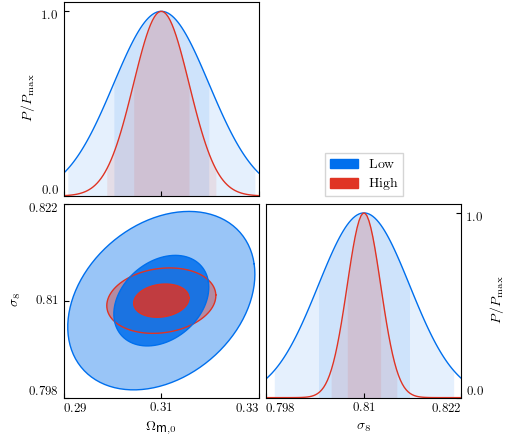

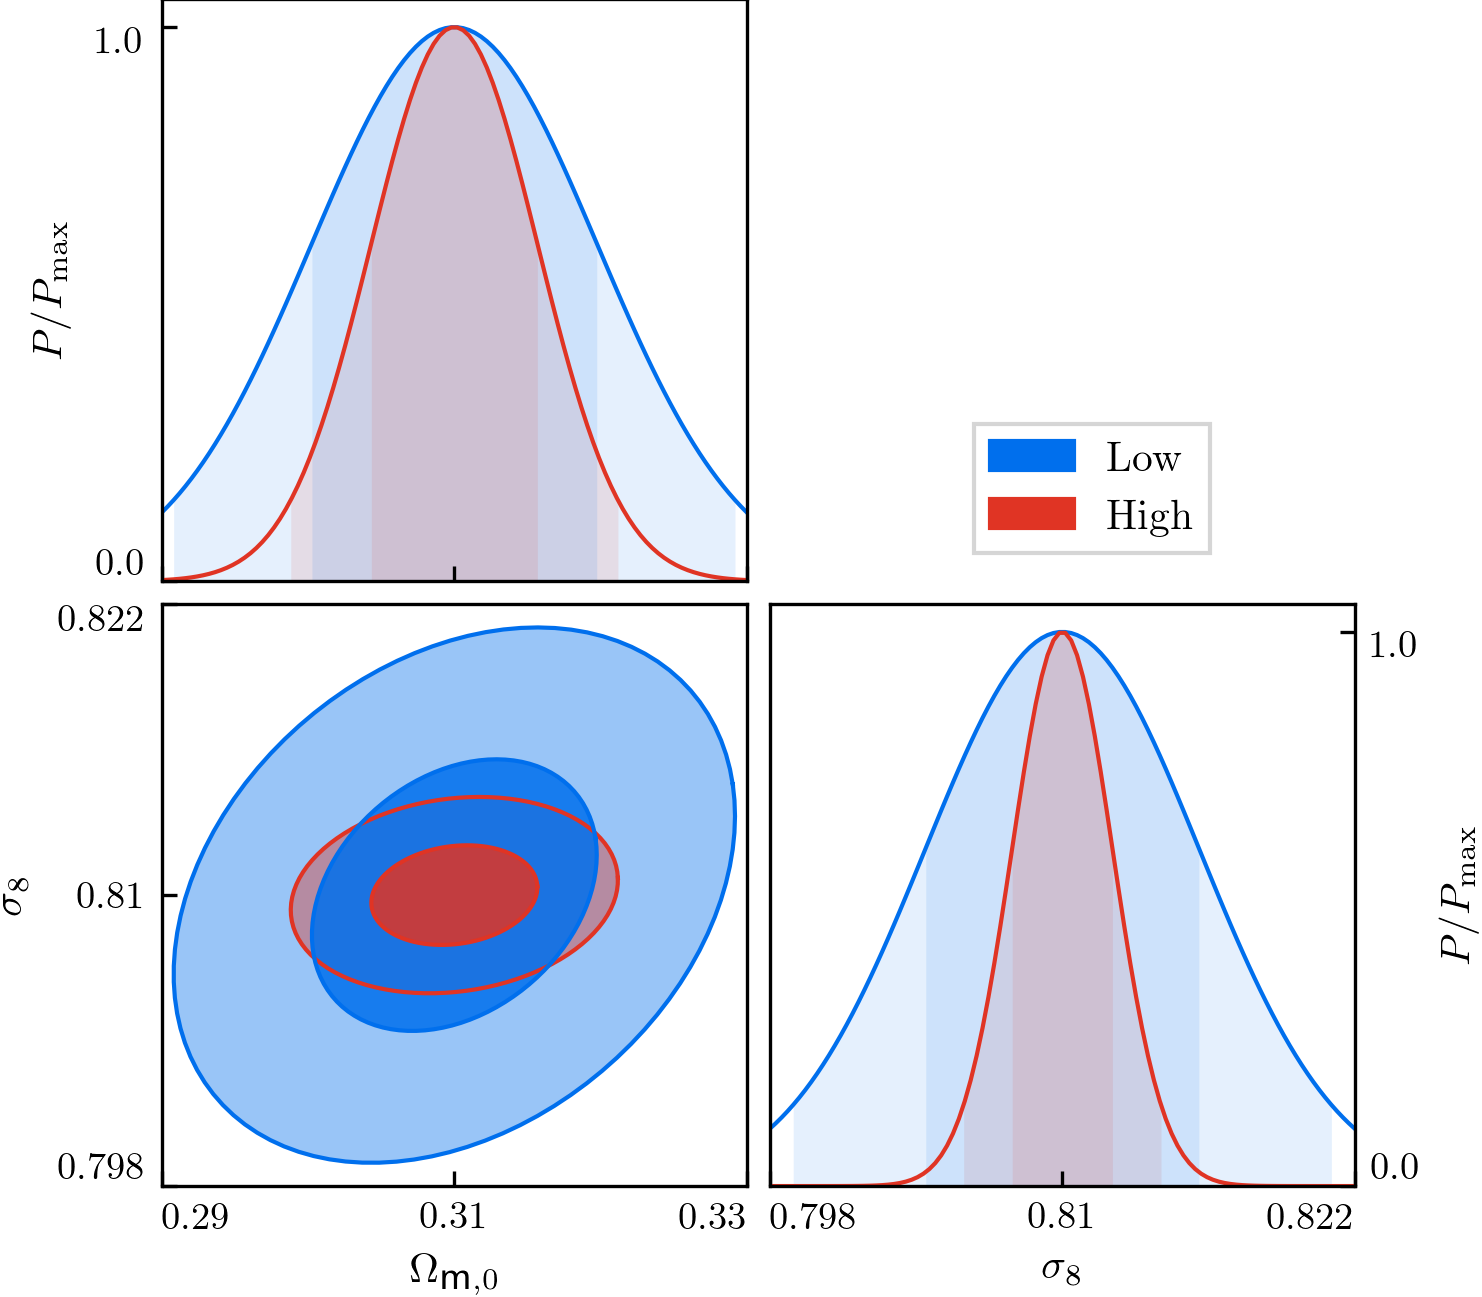

In [98]:
param_names = ['$\Omega_{\mbox{m},0}$', '$\sigma_8$']

fiducial = [0.31, 0.81]


matrix_1 = Fish_mat_low 
matrix_2 = Fish_mat_high 

fisher1 = fm.fisher_matrix( fisher_matrix=matrix_1, fiducial = fiducial, param_names=param_names )
fisher2 = fm.fisher_matrix( fisher_matrix=matrix_2, fiducial = fiducial, param_names=param_names )
fisher1.name = 'Low'
fisher2.name = 'High'

fisher_list = fpa.CosmicFish_FisherAnalysis()
fisher_list.add_fisher_matrix([fisher1,fisher2])
fisher_plotter = fp.CosmicFishPlotter(fishers=fisher_list)

fisher_plotter.new_plot()
fisher_plotter.plot_tri()
fisher_plotter.export('highlow.pdf', dpi=100)
fisher_plotter.export('highlow.png', dpi=100)
IPython.display.Image(filename='highlow.png',unconfined=True)

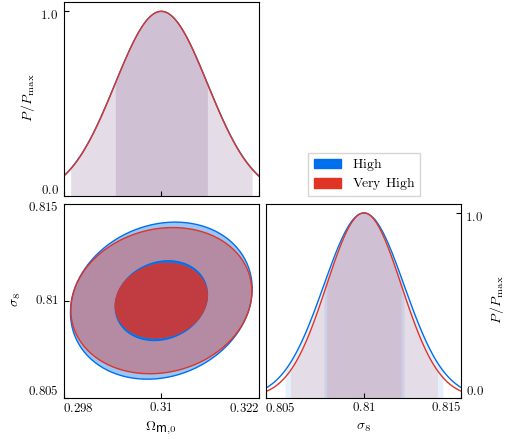

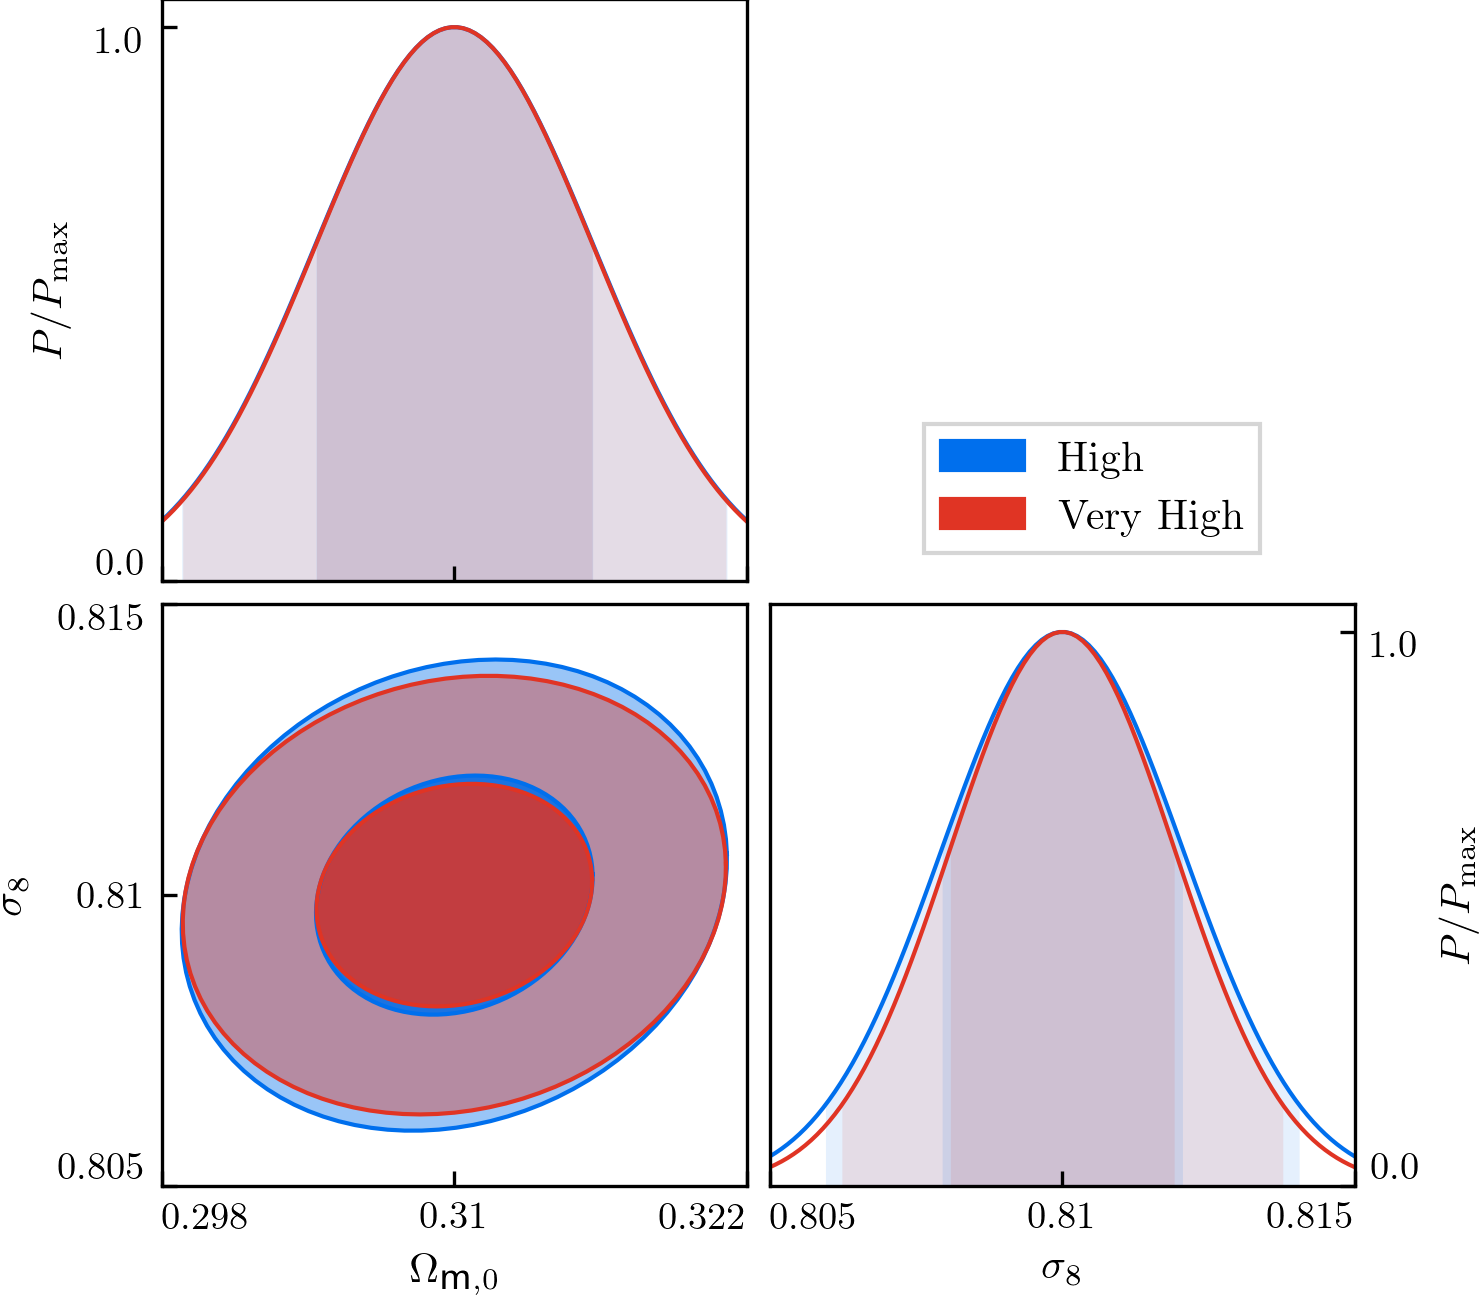

In [99]:
matrix_3 = Fish_mat_v_high

fisher1 = fm.fisher_matrix( fisher_matrix=matrix_2, fiducial = fiducial, param_names=param_names )
fisher2 = fm.fisher_matrix( fisher_matrix=matrix_3, fiducial = fiducial, param_names=param_names )
fisher1.name = 'High'
fisher2.name = 'Very High'

fisher_list = fpa.CosmicFish_FisherAnalysis()
fisher_list.add_fisher_matrix([fisher1,fisher2])
fisher_plotter = fp.CosmicFishPlotter(fishers=fisher_list)

fisher_plotter.new_plot()
fisher_plotter.plot_tri()
fisher_plotter.export('High_Vhigh.pdf', dpi=100)
fisher_plotter.export('High_Vhigh.png', dpi=100)
IPython.display.Image(filename='High_Vhigh.png',unconfined=True)